In [1]:
!pip install plotnine
!pip install liana
!pip install decoupler
!pip install omnipath

!pip install pydeseq2

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 940.4 kB/s eta 0:00:000:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer

In [2]:
!pip install pyqt5 pyqtwebengine


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 6.4 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
# Single-Cell RNA Sequencing
import squidpy as sq
import scanpy as sc
import scipy as scp
import pandas as pd
import numpy as np
import scvi
import seaborn as sns
import pyensembl as ensb

# LIANA
import plotnine as p9

import liana as li
import decoupler as dc
import omnipath as op

# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

INFO:root:Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
INFO:root:Downloading data from `https://omnipathdb.org/queries/interactions?format=json`
INFO:root:Downloading data from `https://omnipathdb.org/queries/complexes?format=json`
INFO:root:Downloading data from `https://omnipathdb.org/queries/annotations?format=json`
INFO:root:Downloading data from `https://omnipathdb.org/queries/intercell?format=json`
INFO:root:Downloading data from `https://omnipathdb.org/about?format=text`


In [122]:
sclcCells = sc.read_h5ad('sclcSinglets.h5ad')
# normalCells = sc.read_h5ad('hlca/normalCells.h5ad')

In [123]:
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length
ensembl_id,,,,,,
ENSG00000121410,False,A1BG,A1BG,NCBITaxon:9606,gene,3999
ENSG00000268895,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374
ENSG00000148584,False,A1CF,A1CF,NCBITaxon:9606,gene,9603
ENSG00000175899,False,A2M,A2M,NCBITaxon:9606,gene,6318
ENSG00000245105,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948
...,...,...,...,...,...,...
ENSG00000174903,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950
ENSG00000159167,False,STC1,STC1,NCBITaxon:9606,gene,4134
ENSG00000136854,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358


In [124]:
sclcCells.var['mitochondrial'] = sclcCells.var.feature_name.str.startswith('MT-') # only one mitochondrial gene, marked as true

In [125]:
ribosomalGeneSet = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt" # filter out ribosomal genes too
df_ribo = pd.read_table(ribosomalGeneSet, skiprows=2, header = None)
sclcCells.var[sclcCells.var.feature_name.isin(df_ribo[0].values)] # # two ribosomal genes
sclcCells.var['ribosomal'] = sclcCells.var.feature_name.isin(df_ribo[0].values) # bool for ribosomal genes

In [126]:
# Calculating QC metrics
sc.pp.calculate_qc_metrics(sclcCells, qc_vars=['mitochondrial', 'ribosomal'], percent_top=None, log1p=False, inplace=True)
sclcCells

AnnData object with n_obs × n_vars = 20561 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [127]:
sclcCells.obs.n_genes_by_counts.min()

186

In [128]:
sc.pp.filter_genes(sclcCells, min_cells=3)# from the df below, each gene is present in a minimum of 10 cells
sc.pp.filter_cells(sclcCells, min_genes=200)# from the df below, each gene is present in a minimum of 10 cells
sclcCells

AnnData object with n_obs × n_vars = 20507 × 21184
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

In [129]:
upper_lim = np.quantile(sclcCells.obs.n_genes_by_counts.values, .98)
upper_lim
sclcCells = sclcCells[sclcCells.obs.n_genes_by_counts < upper_lim]
sclcCells = sclcCells[sclcCells.obs.pct_counts_mitochondrial < 20] # less than 20%
sclcCells = sclcCells[sclcCells.obs.pct_counts_ribosomal < 10] # less than 2%

In [130]:
sclcCells

View of AnnData object with n_obs × n_vars = 6114 × 21184
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmoniz

In [131]:
# Normalisation
sc.pp.normalize_total(sclcCells, target_sum=1e4) #normalize every cell to 10,000 UMI
sc.pp.log1p(sclcCells) #change to log counts
sclcCells.X.sum(axis = 1)
sclcCells.raw = sclcCells

sc.pp.highly_variable_genes(sclcCells, n_top_genes = 2000)

/Users/aaryan/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.


In [132]:
sclcCells.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length,mitochondrial,ribosomal,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
ensembl_id,,,,,,,,,,,,,,,,,
ENSG00000121410,False,A1BG,A1BG,NCBITaxon:9606,gene,3999,False,False,3347,0.156388,83.721609,3215.494629,3347,False,0.512241,1.531479,-1.233271
ENSG00000268895,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374,False,False,417,0.017344,97.971889,356.607117,417,False,0.101821,1.920774,0.221848
ENSG00000175899,False,A2M,A2M,NCBITaxon:9606,gene,6318,False,False,2695,0.181340,86.892661,3728.530029,2695,True,1.128693,2.657093,2.962579
ENSG00000245105,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948,False,False,149,0.007434,99.275327,152.845627,149,False,0.021716,2.341908,0.913430
ENSG00000166535,False,A2ML1,A2ML1,NCBITaxon:9606,gene,7156,False,False,25,0.001475,99.878411,30.327440,25,True,0.009238,2.694983,1.493249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000174903,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950,False,False,3156,0.134623,84.650552,2767.977051,3156,False,0.624000,1.594681,-0.792717
ENSG00000159167,False,STC1,STC1,NCBITaxon:9606,gene,4134,False,False,129,0.007897,99.372599,162.361725,129,True,0.089473,2.869004,1.779025
ENSG00000136854,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358,False,False,376,0.013774,98.171295,283.200073,376,False,0.090565,2.140713,0.583030


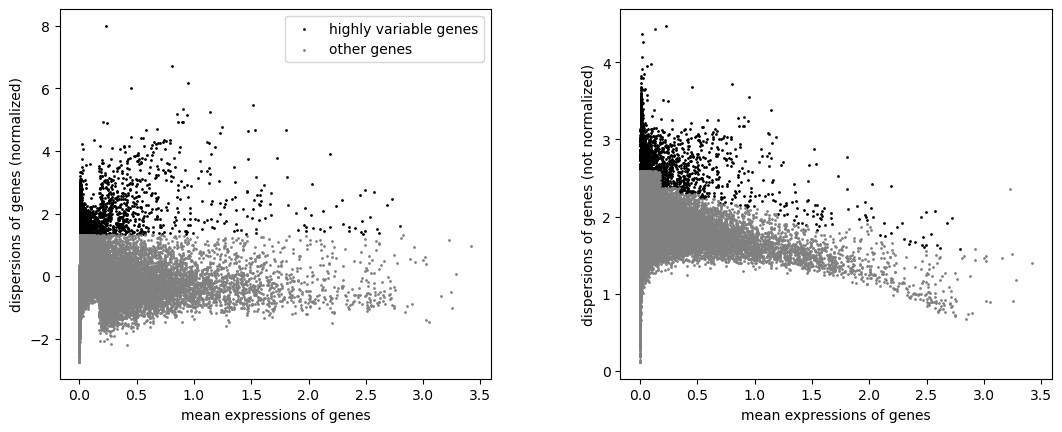

In [133]:
sc.pl.highly_variable_genes(sclcCells)

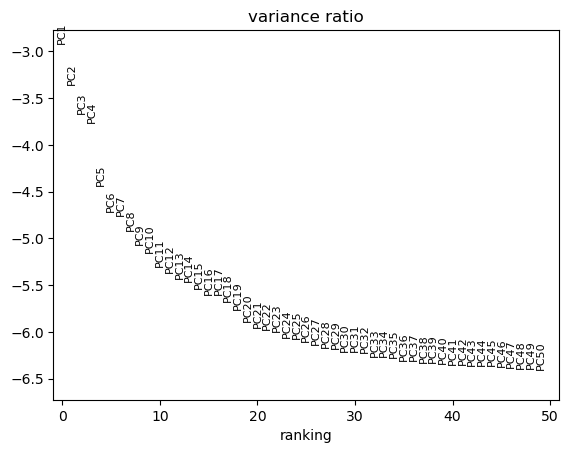

In [134]:
sclcCells = sclcCells[:, sclcCells.var.highly_variable]
sc.pp.regress_out(sclcCells, ['total_counts', 'pct_counts_mitochondrial', 'pct_counts_ribosomal'])
sc.pp.scale(sclcCells, max_value=10)
sc.tl.pca(sclcCells, svd_solver='arpack')
sc.pl.pca_variance_ratio(sclcCells, log=True, n_pcs = 50)

In [135]:
# Use neighbors to set pca value till elbow via graph
sc.pp.neighbors(sclcCells, n_pcs = 30)
# Use Fruchterman-Reingold layout as a fallback
sc.tl.draw_graph(sclcCells, layout='fr')

/Users/aaryan/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


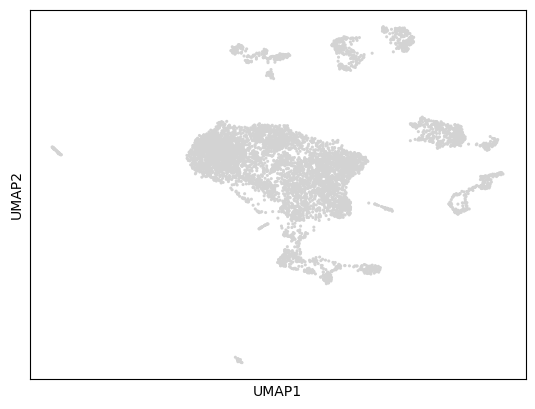

In [136]:
sc.tl.umap(sclcCells)
sc.pl.umap(sclcCells)

In [137]:
# Trajectory Analysis - Clustering & PAGA

sc.tl.leiden(sclcCells, resolution = 0.5)
sc.tl.paga(sclcCells, groups = 'cell_type')

# Access the cluster labels
cluster_labels = sclcCells.obs['cell_type']
cluster_labels

BT1248_GGACAGGATGACCA_lambrechts         CD8-positive, alpha-beta T cell
scrBT1428_GGACGTCAGCTAACAA_lambrechts         capillary endothelial cell
scrBT1428_GTTCTCGCACACAGAG_lambrechts                        native cell
BT1248_TAGCATCTGAACTC_lambrechts                             native cell
scrBT1428_CCTCTGAAGACAAAGG_lambrechts                alveolar macrophage
                                                      ...               
scrBT1428_CGATGTACACTCGACG_lambrechts                elicited macrophage
BT1242_GTACGTGACCATGA_lambrechts                             native cell
scrBT1428_AGACGTTTCTATCGCC_lambrechts                alveolar macrophage
scrBT1428_AACTCCCTCAGATAAG_lambrechts         capillary endothelial cell
BT1247_GCCTCAACAGATCC_lambrechts              capillary endothelial cell
Name: cell_type, Length: 6114, dtype: category
Categories (35, object): ['native cell', 'T cell', 'mast cell', 'club cell', ..., 'bronchus fibroblast of lung', 'alveolar type 1 fibroblast cell', 'a

/Users/aaryan/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


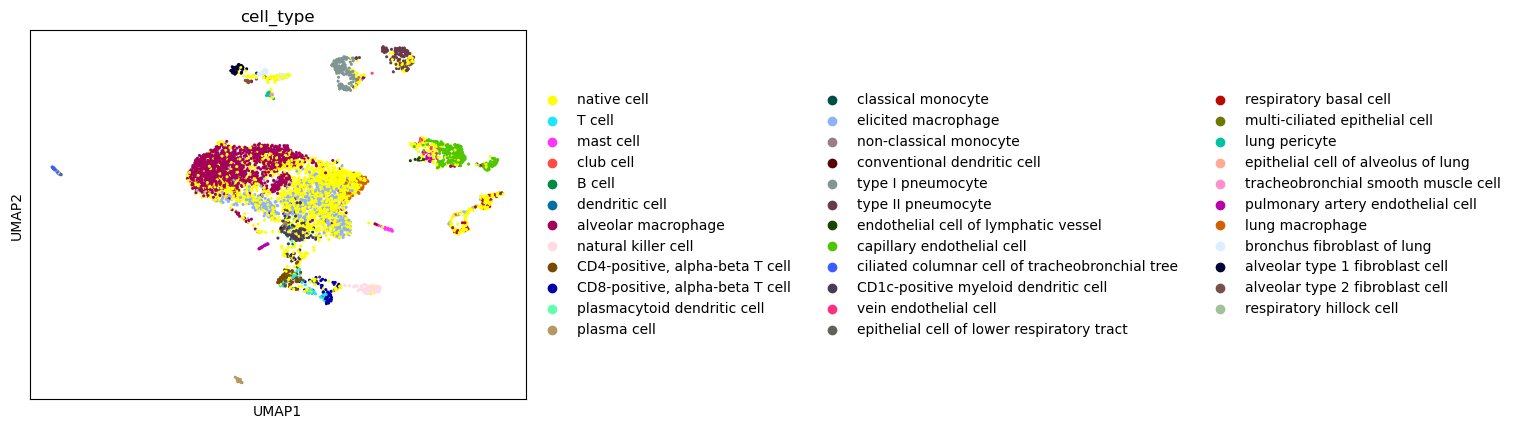

In [138]:
# Plot Leiden Clustering
sc.pl.umap(sclcCells, color='cell_type')


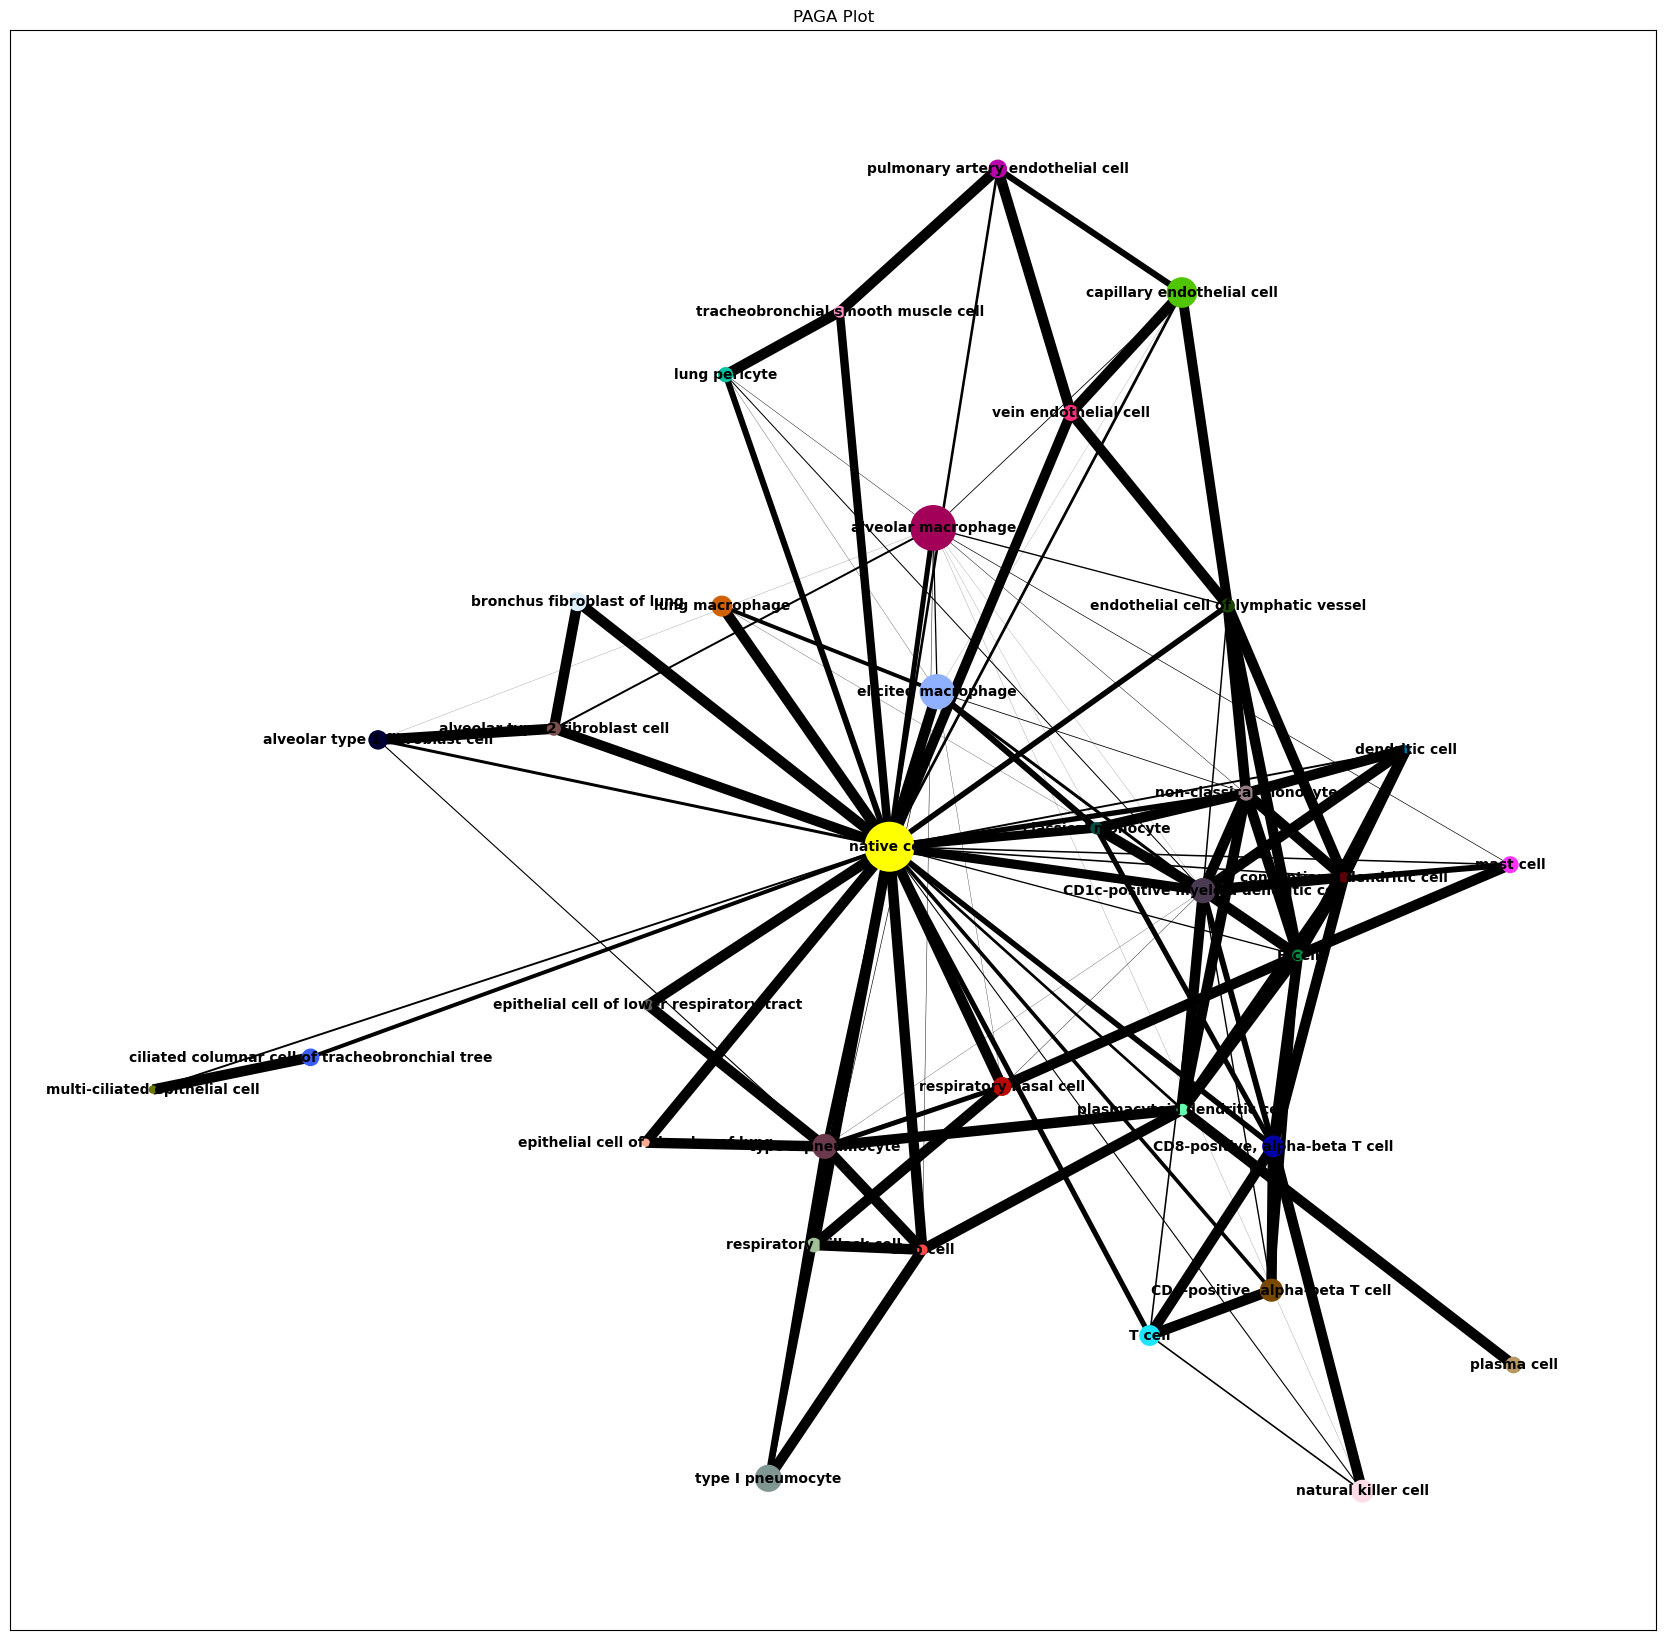

In [141]:
# Create the PAGA plot with Scanpy
sc.pl.paga(sclcCells, color='cell_type', title='PAGA Plot', show=False)

# Customize the size of the plot using matplotlib
plt.gcf().set_size_inches(20, 20)  # Set the size of the plot as needed

# Show the plot
plt.show()

In [143]:
# Assuming 'sclcCells' is your AnnData object

# Filter out groups with only one sample
valid_groups = [group for group in sclcCells.obs['cell_type'].unique() if sclcCells.obs['cell_type'].value_counts()[group] > 1]

# Run rank_genes_groups with adjusted groups
sc.tl.rank_genes_groups(sclcCells, 'cell_type', groups=valid_groups)

/Users/aaryan/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/aaryan/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/aaryan/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

In [144]:
markers = sc.get.rank_genes_groups_df(sclcCells, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,"CD8-positive, alpha-beta T cell",ENSG00000271503,19.071775,6.455342,5.880528e-30,4.267664e-29
1,"CD8-positive, alpha-beta T cell",ENSG00000166710,18.880838,0.912814,2.361840e-30,1.733653e-29
2,"CD8-positive, alpha-beta T cell",ENSG00000277734,18.040770,6.517471,1.687126e-28,1.183446e-27
3,"CD8-positive, alpha-beta T cell",ENSG00000145649,16.723253,6.844896,1.499732e-26,1.001902e-25
4,"CD8-positive, alpha-beta T cell",ENSG00000008517,15.856140,4.469135,2.258967e-25,1.461636e-24
...,...,...,...,...,...,...
656946,epithelial cell of lower respiratory tract,ENSG00000163479,3.968894,1.399286,2.814632e-02,4.895334e-02
656947,epithelial cell of lower respiratory tract,ENSG00000116288,3.955463,1.033260,2.811540e-02,4.891023e-02
656948,epithelial cell of lower respiratory tract,ENSG00000095380,3.945818,1.874672,2.875319e-02,4.986146e-02
656949,epithelial cell of lower respiratory tract,ENSG00000139644,3.927011,0.516435,2.741040e-02,4.785018e-02


def ensemblIDfGene(adata,gene):
    '''
    ENSEMBL ID from gene
    '''
    obj = adata.var[adata.var.feature_name == gene]
    id = obj.index.tolist()[0]
    return id

def genefEnsemblID(adata,id):
    '''
    Gene from ENSEMBL ID
    '''
    obj = adata.var[adata.var.index == id]
    gene_name = obj.feature_name.tolist()[0]
    return gene_name

In [116]:
adata.raw.X

<700x765 sparse matrix of type '<class 'numpy.float32'>'
	with 174400 stored elements in Compressed Sparse Row format>

In [109]:
li.mt.show_methods()

,Method Name,Magnitude Score,Specificity Score,Reference
0,CellPhoneDB,lr_means,cellphone_pvals,"Efremova, M., Vento-Tormo, M., Teichmann, S.A...."
0,Connectome,expr_prod,scaled_weight,"Raredon, M.S.B., Yang, J., Garritano, J., Wang..."
0,log2FC,None,lr_logfc,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,NATMI,expr_prod,spec_weight,"Hou, R., Denisenko, E., Ong, H.T., Ramilowski,..."
0,SingleCellSignalR,lrscore,None,"Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ..."
0,CellChat,lr_probs,cellchat_pvals,"Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha..."
0,Rank_Aggregate,magnitude_rank,specificity_rank,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,Geometric Mean,lr_gmeans,gmean_pvals,CellPhoneDBv2's permutation approach applied t...


In [4]:
# import liana's rank_aggregate
from liana.mt import rank_aggregate

In [5]:
?rank_aggregate.__call__

Signature:
rank_aggregate.__call__(
    adata: 'an.AnnData | MuData',
    groupby: 'str',
    resource_name: 'str' = 'consensus',
    expr_prop: 'float' = 0.1,
    min_cells: 'int' = 5,
    groupby_pairs: 'Optional[DataFrame]' = None,
    base: 'float' = 2.718281828459045,
    aggregate_method: 'str' = 'rra',
    consensus_opts: 'Optional[list]' = None,
    return_all_lrs: 'bool' = False,
    key_added: 'str' = 'liana_res',
    use_raw: 'Optional[bool]' = True,
    layer: 'Optional[str]' = None,
    de_method: 'str' = 't-test',
    n_perms: 'int' = 1000,
    seed: 'int' = 1337,
    n_jobs: 'int' = 1,
    resource: 'Optional[DataFrame]' = None,
    interactions: 'Optional[list]' = None,
    mdata_kwargs: 'dict' = {},
    inplace: 'bool' = True,
    verbose: 'Optional[bool]' = False,
)
Docstring:
Get an aggregate of ligand-receptor scores from multiple methods.

Parameters
----------
adata
    Annotated data object.
groupby
    Key to be used for grouping.
resource_name
    Name of the r

In [6]:
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean


In [10]:
sclcCells_Genes = sc.read_h5ad('hlca/sclcSingletwGenes.h5ad')
sclcCells_Genes.var

,feature_is_filtered,original_gene_symbols,feature_name,feature_reference,feature_biotype,feature_length
A1BG,False,A1BG,A1BG,NCBITaxon:9606,gene,3999
A1BG-AS1,False,A1BG-AS1,A1BG-AS1,NCBITaxon:9606,gene,3374
A1CF,False,A1CF,A1CF,NCBITaxon:9606,gene,9603
A2M,False,A2M,A2M,NCBITaxon:9606,gene,6318
A2M-AS1,False,A2M-AS1,A2M-AS1,NCBITaxon:9606,gene,2948
...,...,...,...,...,...,...
RAB1B,False,RAB1B,RAB1B,NCBITaxon:9606,gene,1950
STC1,False,STC1,STC1,NCBITaxon:9606,gene,4134
STXBP1,False,STXBP1,STXBP1,NCBITaxon:9606,gene,9358
TEC,False,TEC,TEC,NCBITaxon:9606,gene,4004


In [11]:
cellphonedb(sclcCells_Genes, groupby='cell_type', expr_prop=0.1, resource_name='consensus', verbose=True, use_raw = False, key_added='cpdb_res')

INFO:root:Using `.X`!
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
INFO:root:Using resource `consensus`.
INFO:root:0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 20555 samples and 1610 features


100%|██████████| 1000/1000 [00:17<00:00, 58.35it/s]


In [201]:
len(sclcCells_Genes.uns['cpdb_res']['receptor'].unique())

483

In [186]:
# Using SingleCellSignalR as main mode of cell-cell communication analysis
singlecellsignalr(sclcCells_Genes, groupby='cell_type', expr_prop=0.1, resource_name='consensus', verbose=True, use_raw = False, key_added='cpdb_res')

INFO:root:Using `.X`!
/Users/aaryan/anaconda3/lib/python3.11/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
INFO:root:Using resource `consensus`.
INFO:root:0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 20555 samples and 23854 features


In [203]:
# singlecellsignalR
sclcCells_Genes.uns['cpdb_res']

,ligand,ligand_complex,ligand_means,ligand_props,mat_mean,receptor,receptor_complex,receptor_means,receptor_props,source,target,lrscore
80976,S100A9,S100A9,4.408327,0.974922,0.07023,AGER,AGER,3.852112,0.981618,classical monocyte,type I pneumocyte,0.983243
80975,S100A8,S100A8,4.065452,0.984326,0.07023,AGER,AGER,3.852112,0.981618,classical monocyte,type I pneumocyte,0.982563
39202,SCGB3A2,SCGB3A2,6.501814,1.000000,0.07023,MARCO,MARCO,2.336166,0.903509,epithelial cell of lower respiratory tract,alveolar macrophage,0.982299
43330,B2M,B2M,5.520830,0.994652,0.07023,KLRD1,KLRD1,2.450770,0.911263,capillary endothelial cell,natural killer cell,0.981265
149399,TIMP1,TIMP1,4.572209,1.000000,0.07023,CD63,CD63,2.958546,0.970149,mesothelial cell,bronchus fibroblast of lung,0.981263
...,...,...,...,...,...,...,...,...,...,...,...,...
7276,WNT10A,WNT10A,0.019351,0.100000,0.07023,LRP6,FZD3_LRP6,0.022728,0.100000,mesothelial cell,mesothelial cell,0.229951
6822,SELPLG,SELPLG,0.019351,0.100000,0.07023,ITGAM,ITGAM,0.019351,0.100000,mesothelial cell,mesothelial cell,0.216019
7120,SPP1,SPP1,0.019351,0.100000,0.07023,PTGER4,PTGER4,0.019351,0.100000,mesothelial cell,mesothelial cell,0.216019
6826,ICAM4,ICAM4,0.019351,0.100000,0.07023,ITGAM,ITGAM,0.019351,0.100000,mesothelial cell,mesothelial cell,0.216019


In [204]:
len(sclcCells_Genes.uns['cpdb_res']['receptor'].unique())

483

In [227]:
sclcCells_Genes.uns['cpdb_res']['lrscore'].unique().tolist()


[0.9832428693771362,
 0.9825626015663147,
 0.9822989702224731,
 0.9812648892402649,
 0.9812626838684082,
 0.9811104536056519,
 0.981109619140625,
 0.9810196757316589,
 0.9808734655380249,
 0.9808638691902161,
 0.9806034564971924,
 0.9805914163589478,
 0.980361819267273,
 0.9802938103675842,
 0.9802674055099487,
 0.9802286624908447,
 0.9801509380340576,
 0.9800293445587158,
 0.980013370513916,
 0.9798502922058105,
 0.979847252368927,
 0.9797971248626709,
 0.9797881841659546,
 0.9797198176383972,
 0.9796703457832336,
 0.9796040058135986,
 0.9795987010002136,
 0.979588508605957,
 0.979378342628479,
 0.9793685674667358,
 0.9793609976768494,
 0.9791627526283264,
 0.9791536331176758,
 0.9791516661643982,
 0.9790635108947754,
 0.978938639163971,
 0.978934109210968,
 0.9787219166755676,
 0.9787154793739319,
 0.9785822629928589,
 0.9785371422767639,
 0.9784522652626038,
 0.9783975481987,
 0.9783623218536377,
 0.9783390164375305,
 0.9782958626747131,
 0.9781994819641113,
 0.9781712889671326,
 0.

In [242]:
source = sclcCells_Genes.uns['cpdb_res']['source'].unique().tolist()
target = sclcCells_Genes.uns['cpdb_res']['target'].unique().tolist()

['type I pneumocyte',
 'alveolar macrophage',
 'natural killer cell',
 'bronchus fibroblast of lung',
 'mast cell',
 'dendritic cell',
 'alveolar type 2 fibroblast cell',
 'vein endothelial cell',
 'elicited macrophage',
 'alveolar type 1 fibroblast cell',
 'plasmacytoid dendritic cell',
 'lung macrophage',
 'mesothelial cell',
 'type II pneumocyte',
 'lung pericyte',
 'native cell',
 'epithelial cell of lower respiratory tract',
 'endothelial cell of lymphatic vessel',
 'conventional dendritic cell',
 'pulmonary artery endothelial cell',
 'CD1c-positive myeloid dendritic cell',
 'tracheobronchial smooth muscle cell',
 'non-classical monocyte',
 'B cell',
 'CD8-positive, alpha-beta T cell',
 'ciliated columnar cell of tracheobronchial tree',
 'respiratory basal cell',
 'classical monocyte',
 'CD4-positive, alpha-beta T cell',
 'capillary endothelial cell',
 'T cell',
 'nasal mucosa goblet cell',
 'respiratory hillock cell',
 'plasma cell',
 'club cell']

INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


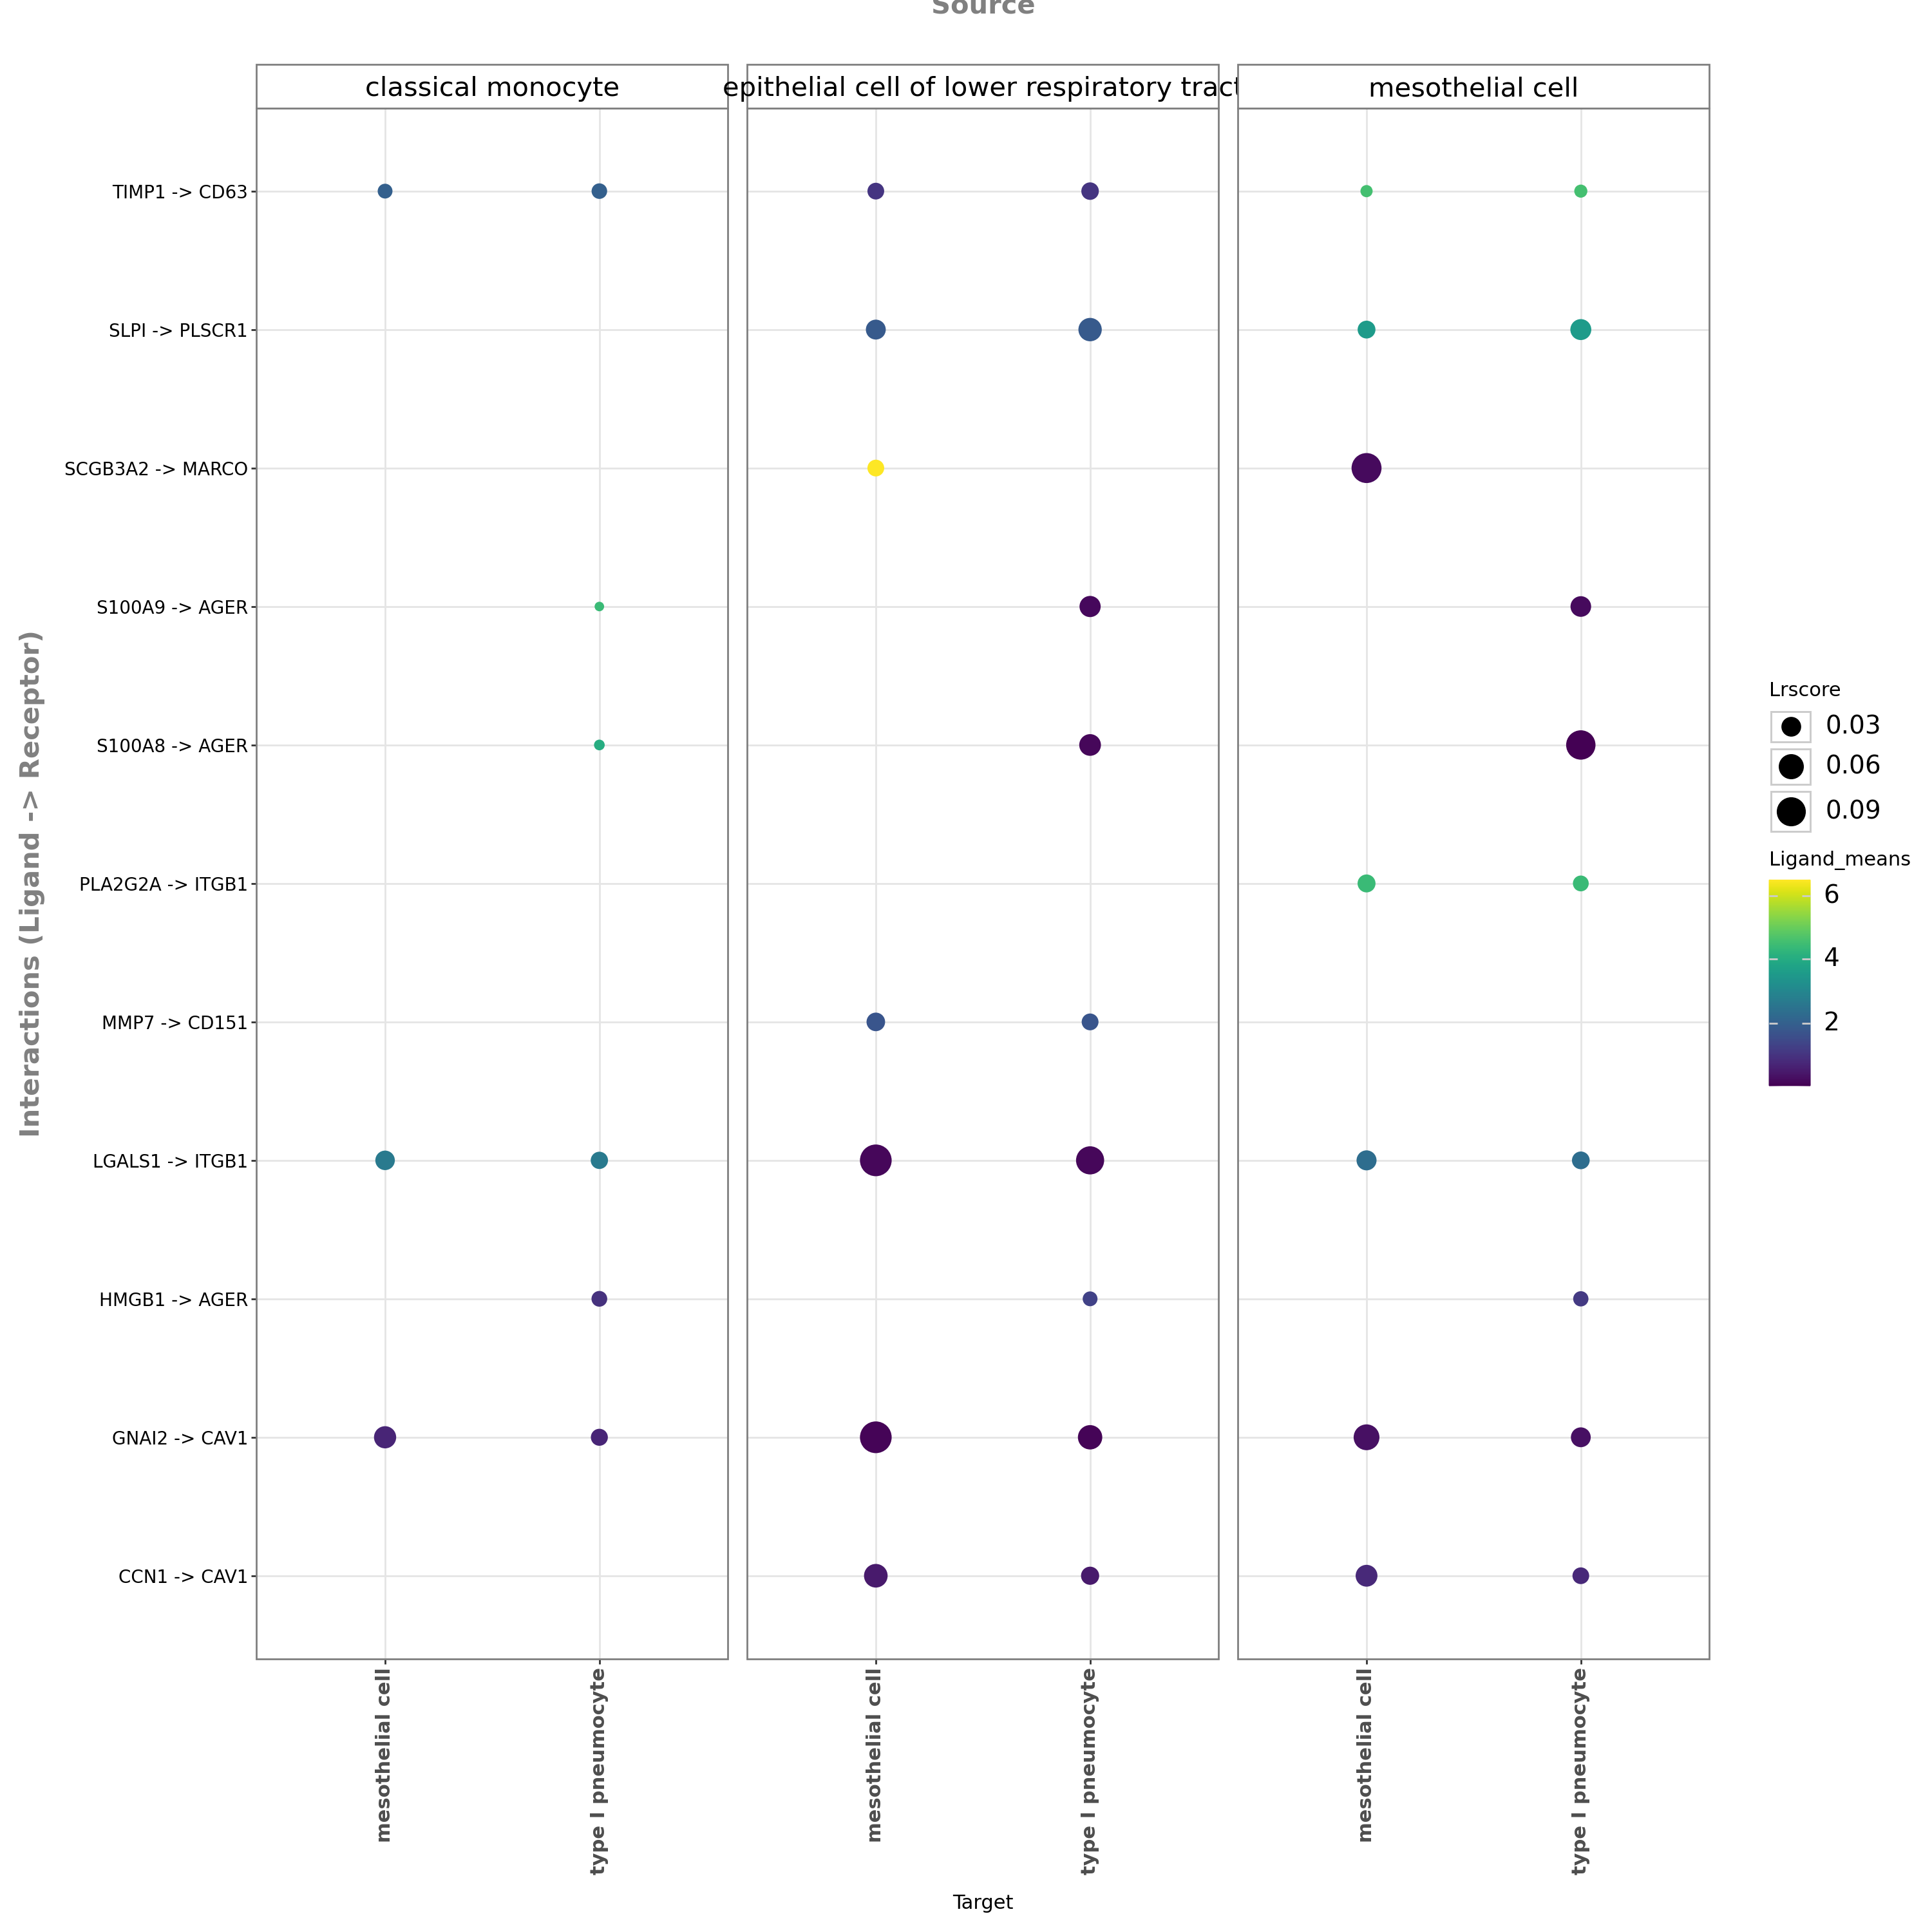

In [231]:
#Plot for singlecellsignalR

li.pl.dotplot(adata = sclcCells_Genes,
              colour='ligand_means',
              size= 'lrscore',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=['classical monocyte', 'epithelial cell of lower respiratory tract' , 'mesothelial cell'],
              target_labels=['type I pneumocyte','mesothelial cell'],
              figure_size = (15,15),
             # finally, since cpdbv2 suggests using a filter to FPs
              # we filter the pvals column to <= 0.05
              filter_fun=lambda x: x['lrscore'] >= 0.95,
              uns_key='cpdb_res' # uns_key to use, default is 'liana_res'
             )

In [232]:
## Rank Aggregate
li.mt.rank_aggregate(adata, groupby='bulk_labels', expr_prop=0.1, verbose=True)

INFO:root:Using `.X`!
/Users/aaryan/anaconda3/lib/python3.11/site-packages/liana/method/_pipe_utils/_pre.py:148: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
INFO:root:Using resource `consensus`.
INFO:root:0.12 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 20555 samples and 23854 features


/Users/aaryan/anaconda3/lib/python3.11/site-packages/liana/method/sc/_liana_pipe.py:251: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.


Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|███████████████████████████████████████| 1000/1000 [00:14<00:00, 66.85it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|███████████████████████████████████████| 1000/1000 [07:02<00:00,  2.36it/s]


In [234]:
rank_aggregate.describe()

Rank_Aggregate returns `magnitude_rank`, `specificity_rank`. magnitude_rank and specificity_rank respectively represent an aggregate of the `magnitude`- and `specificity`-related scoring functions from the different methods.


/Users/aaryan/anaconda3/lib/python3.11/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


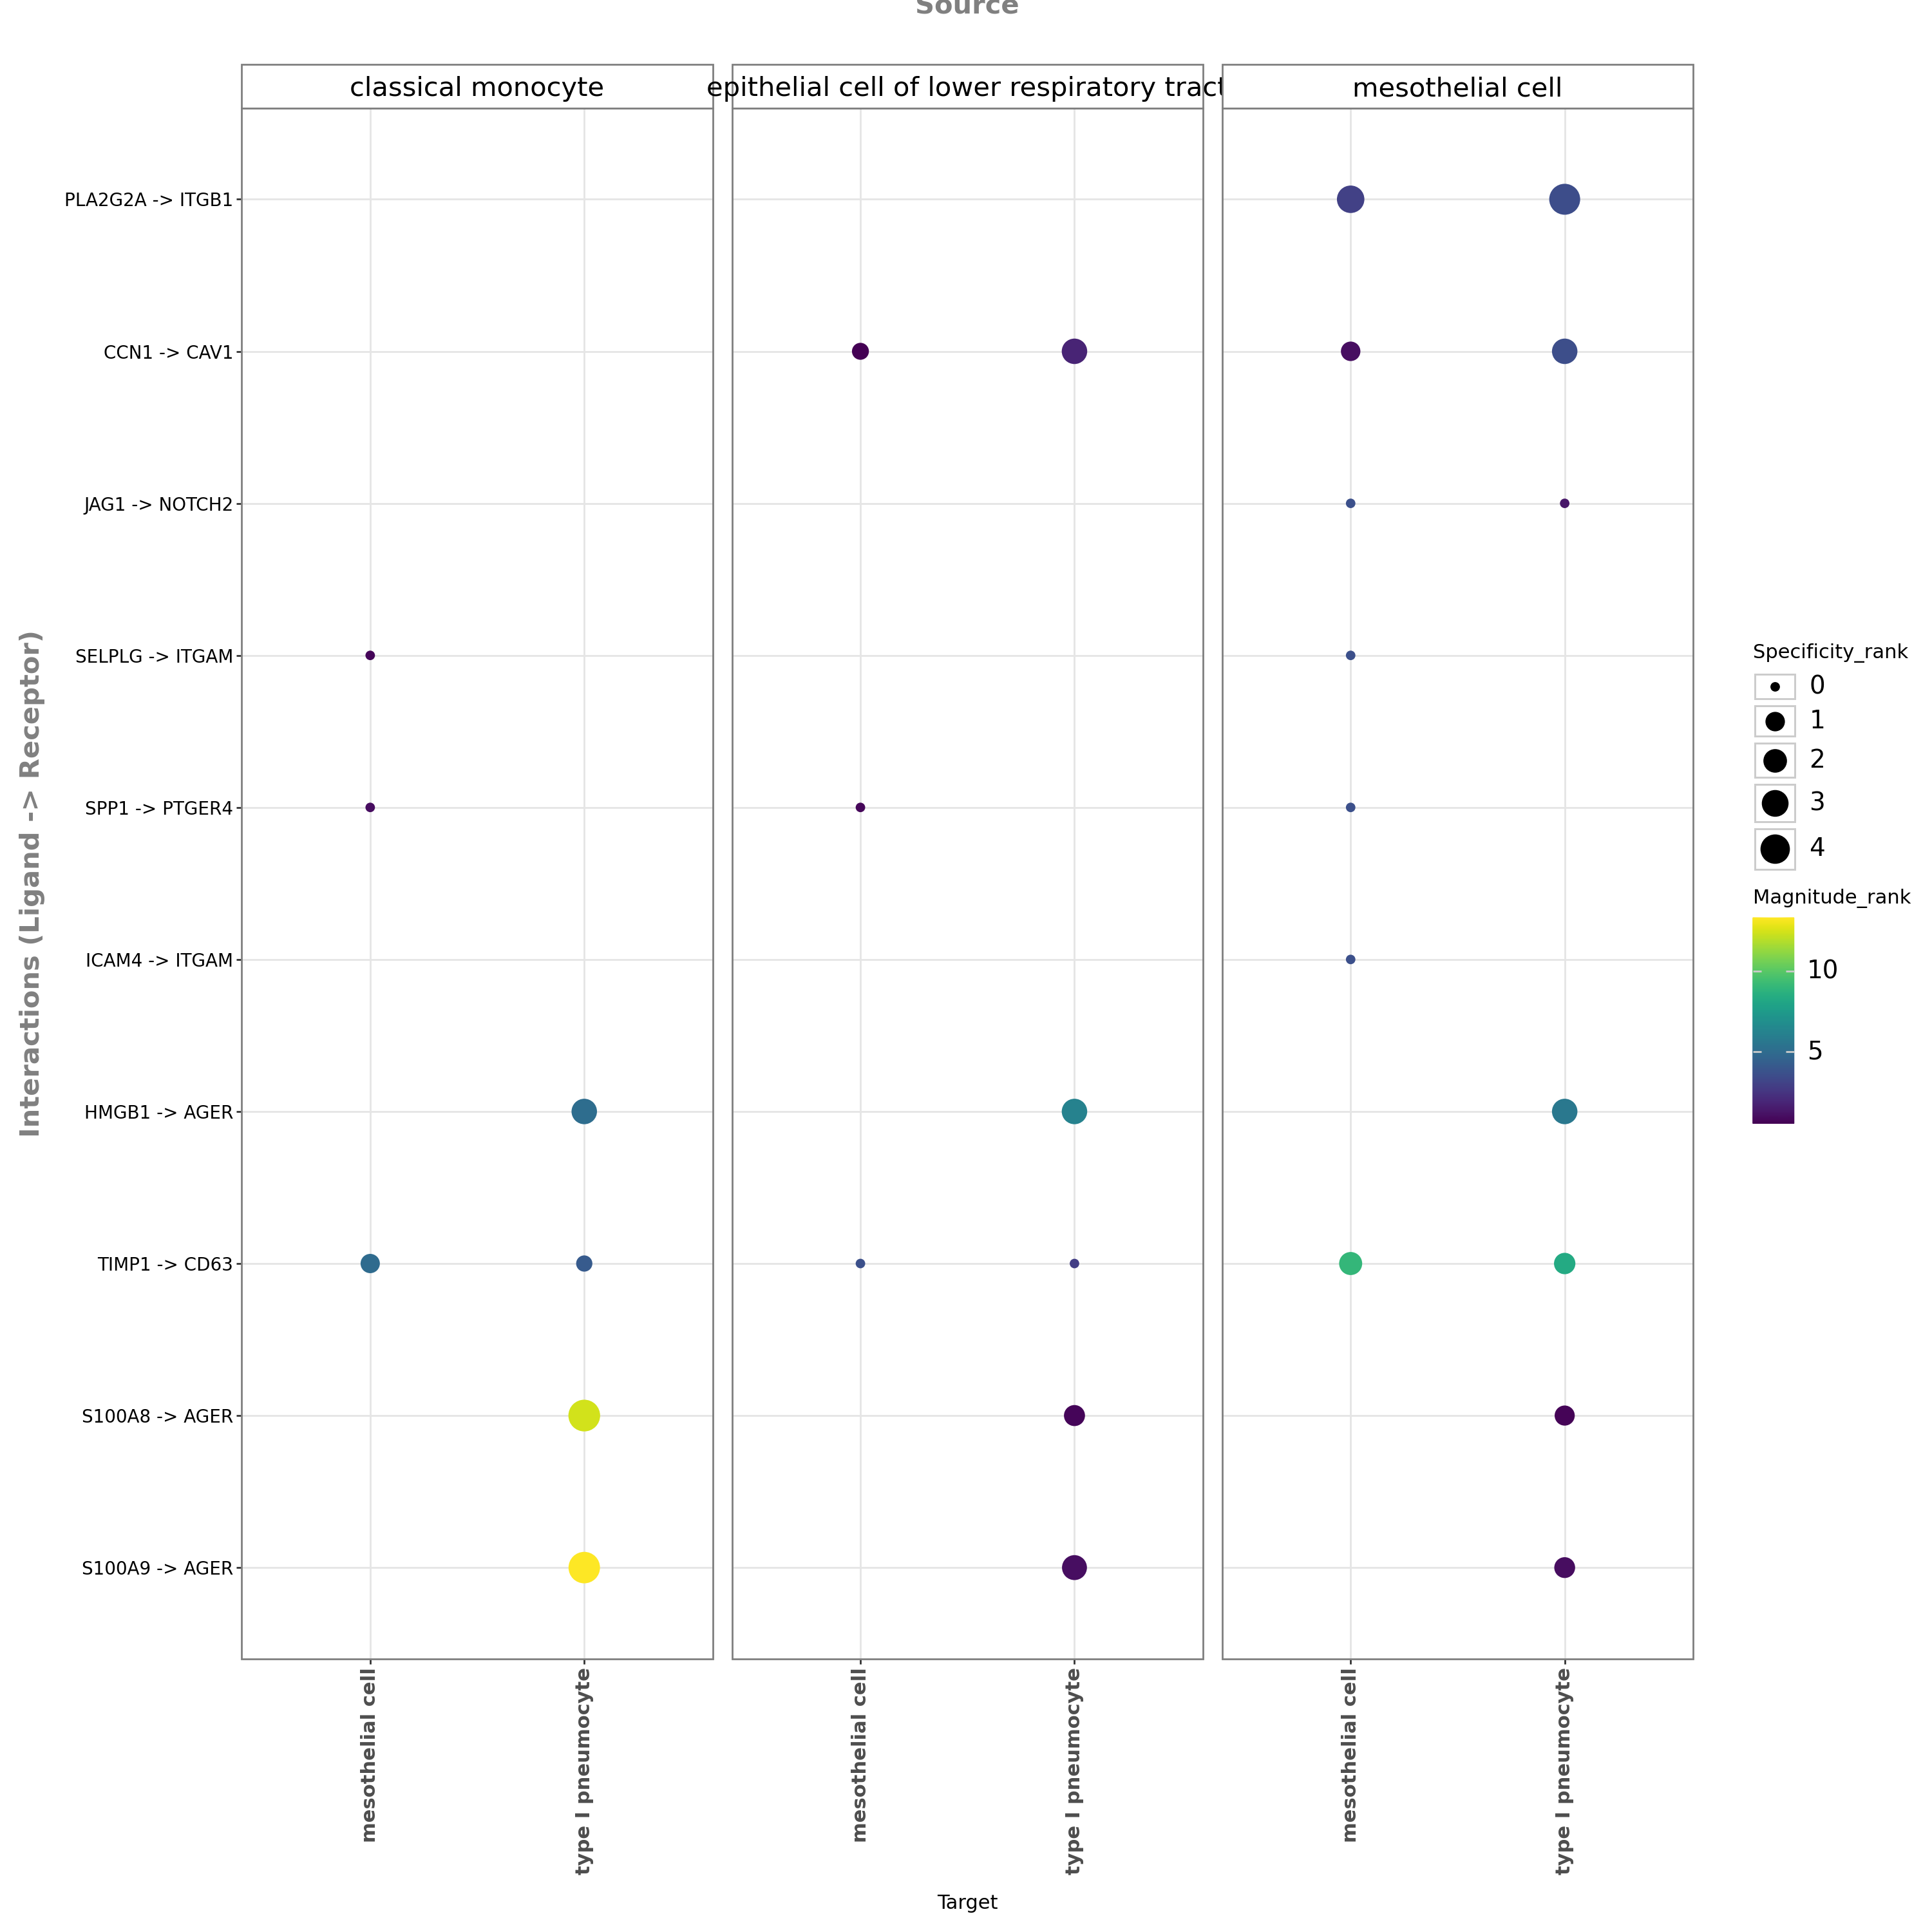

In [240]:
li.pl.dotplot(sclcCells_Genes,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['classical monocyte', 'epithelial cell of lower respiratory tract', 'mesothelial cell'],
              target_labels=['type I pneumocyte', 'mesothelial cell'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 15),
              uns_key='cpdb_res'  # Assuming 'cpdb_res' is the correct key for SingleCellSignalR results
             )